# PERBANDINGAN BULAN HUJAN
## Januari 2023

In [4]:
import pandas as dp
import numpy as np
from datetime import datetime
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

#Unggah File Synoptik
dft = dp.read_csv('C:/Users/Acer/Documents/HujanSynop01.csv')
#Unggah File AWS
df = dp.read_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/DATA AWS 00-12 Januari 2023.csv')

In [5]:
#Filter data AWS di Jam 23:00
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
midnight_filter = df[df['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]

In [6]:
#Mengolah Dataframe AWS
'''
df=midnight_filter.drop(midnight_filter.index[0])
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
df['Tgl']=Tgl
'''
df1_4 = midnight_filter['rr']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rr': df1_4.values, 'Tgl': Tgl})
#Mengolah Dataframe Synoptik
a=dft.drop(columns=['KETERANGAN','KETERANGAN.1','KETERANGAN.2'])
b=a.drop(a.index[-2:])
b=b.drop(b.index[0])
df_gabungan = dp.concat([b['TANGGAL'], b['TANGGAL.1'], b['TANGGAL.2']], ignore_index=True)
df_gabungan1=dp.concat([b['CH (mm)'], b['CH (mm).1'], b['CH (mm).2']], ignore_index=True)
df_cleaned = df_gabungan.dropna()
df_cleaned2 = df_gabungan1.dropna()
df_cleaned=dp.DataFrame(df_cleaned)
df_cleaned['CH (mm)']=df_cleaned2
df_replaced = df_cleaned.replace('-', 0)

In [7]:
#UJI T
def ujiT(synop):
  global p_two4
  sample1_bar4, sample2_bar4 = np.mean(df_sorted_4[synop]), np.mean(df_sorted1_4['rr'])
  n14, n24 = len(df_sorted_4[synop]), len(df_sorted_4[synop])
  df_4=(n14+n24)-2
  var_sample14, var_sample24= np.var(df_sorted_4[synop], ddof=1), np.var(df_sorted1_4['rr'], ddof=1)

  # pooled sample variance
  var4 = ( ((n14-1)*var_sample14) + ((n24-1)*var_sample24) ) / (n14+n24-2)

  # standard error
  std_error4 = np.sqrt(var4 * (1.0 / n14 + 1.0 / n24))

  # calculate t statistics
  t4 = abs(sample1_bar4- sample2_bar4) / std_error4
  print('t static:',t4)
  # two-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.975, df=df_4)
  print("Critical value for t two tailed:",t_c4)


  # one-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.95, df=df_4)
  print("Critical value for t one tailed:",t_c4)


  # get two-tailed p value
  p_two4= 2*(1-stats.t.cdf(x=t4, df=df_4))
  print("p-value for two tailed:",p_two4)

  # get one-tailed p value
  p_one4= 1-stats.t.cdf(x=t4, df=df_4)
  print("p-value for one tailed:",p_one4)
  if p_two4>=0.05:
    print("Tidak ada perbedaan yang signifikan antara dua kelompok data")
  else:
    print("Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).")

In [8]:
#Uji Mann-Whitney U
def mwu(synop):
  global p_value
  df_cleaned_4['rr'] = df_cleaned_4['rr'].astype(float)
  stat, p_value = mannwhitneyu(df_cleaned_4['rr'], df_cleaned14[synop])
  print('Statistics=%.2f, p=%.2f' % (stat, p_value))
  # Level of significance
  alpha = 0.05
  # conclusion
  if p_value < alpha:
      print('Terdapat perbedaan yang siginifikan antara 2 sampel data')
  else:
      print('Tidak ada perbedaan yang siginifikan antara 2 sampel data')

In [9]:
#Normalisasi Data
def absolute_maximum_scale(series):
  return series / series.abs().max()

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=155.00, p=0.50
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\Acer\AppData\Local\Temp\ipykernel_12000\4147796662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['rr'] = df_cleaned_4['rr'].astype(float)


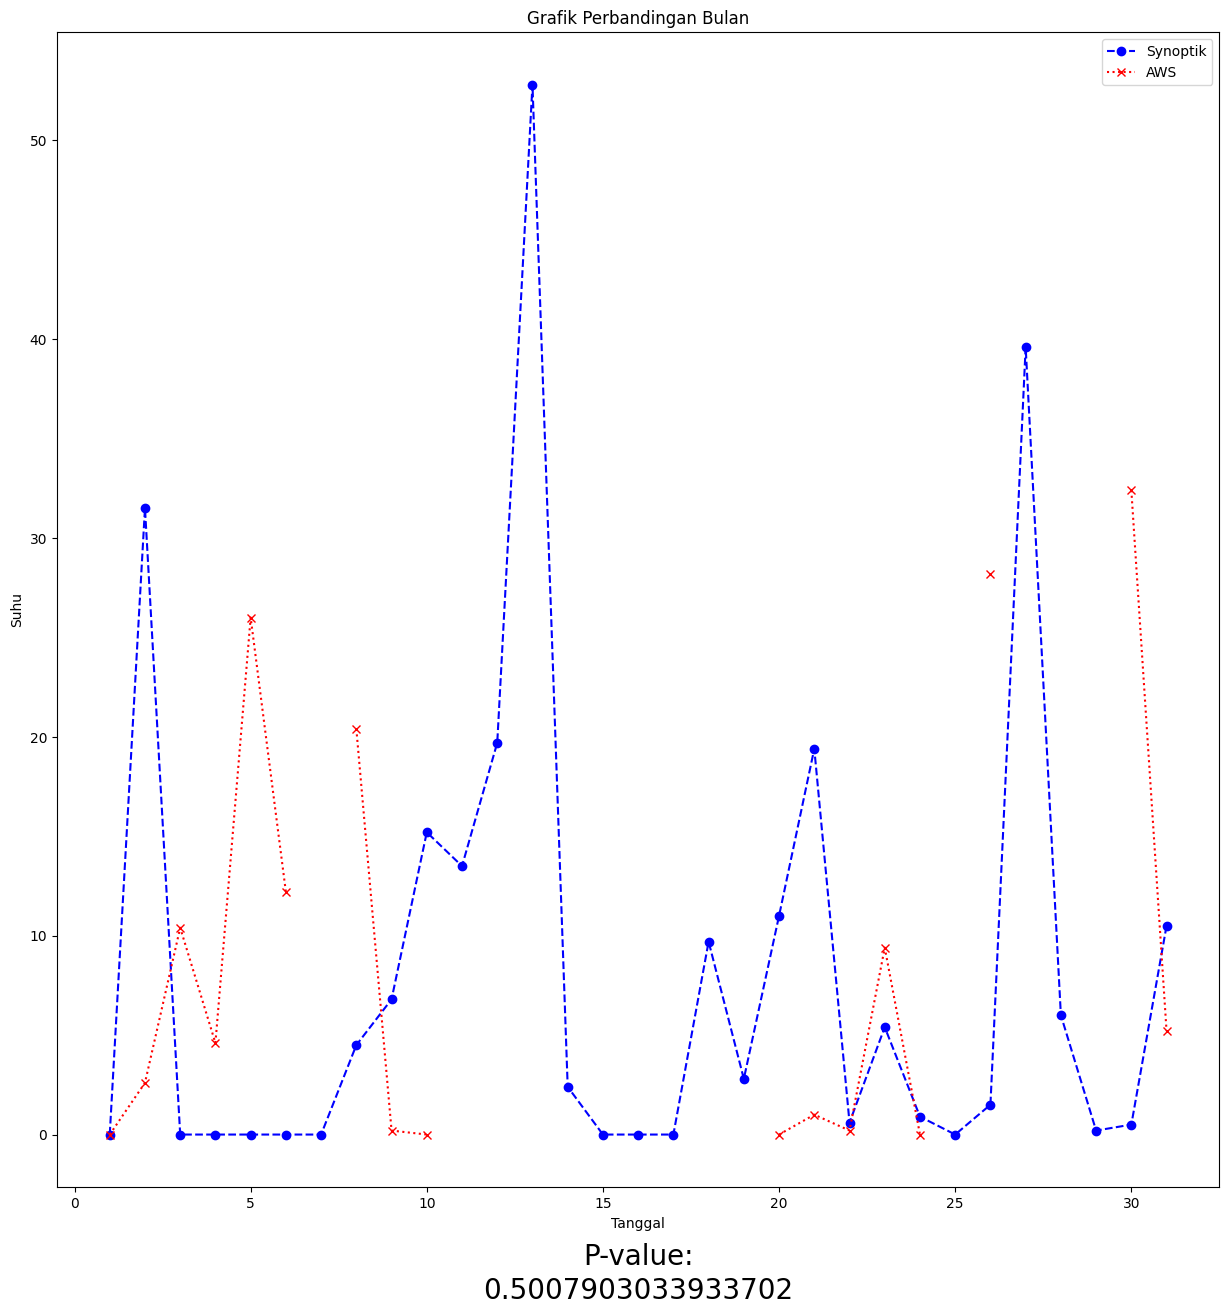

In [15]:
#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)


#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Hapus tanggal synoptik yang di AWS adalah NaN
df_replaced['CH (mm)']=df_replaced['CH (mm)'].astype(float)
df_replaced=df_replaced.dropna(axis=1)
filter_hapus4 = df_replaced.isin(c4).any(axis=1)
df_cleaned14 = df_replaced.drop(df_replaced[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='CH (mm)', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rr', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['CH (mm)'])
#AWS
df_sorted1_4['rr'] = df_sorted1_4['rr'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rr'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('CH (mm)')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['CH (mm)']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14[0]
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='CH (mm)', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['CH (mm)'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('CH (mm)')
    else:
      print("Dilakukan Uji T")
      ujiT('CH (mm)')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rr']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rr', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rr'] = df_sorted1_4['rr'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rr'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('CH (mm)')
    else:
      print("Dilakukan Uji T")
      ujiT('CH (mm)')

#Grafik
print("Grafik Perbandingannya:")
df_replaced[0]=df_replaced[0].astype(int)
df1_4['rr']=df1_4['rr'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Bulan')
plt.plot(df_replaced[0], df_replaced['CH (mm)'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rr'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()